In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris=load_iris()

In [4]:
# iris.data


In [5]:
import seaborn as sns

In [6]:
df=sns.load_dataset('iris')

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [8]:
# independent features  and dependent features
X=df.iloc[:,:-1]
y=iris.target

In [9]:
X,y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [10]:
## train test split data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=25,random_state=10)

In [11]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
13,4.3,3.0,1.1,0.1
69,5.6,2.5,3.9,1.1
77,6.7,3.0,5.0,1.7
135,7.7,3.0,6.1,2.3
136,6.3,3.4,5.6,2.4


In [12]:
y_train

array([0, 1, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 0, 0, 1, 0, 2, 2, 2, 1,
       0, 2, 0])

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
#  post prunning / also called cost complexity prunning


In [26]:
#  train with multiple prunning parameter
treemodel= DecisionTreeClassifier(
    random_state=42,
    max_depth=5,
    min_samples_leaf=4,
    ccp_alpha=0.01
)


In [27]:
treemodel.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.01, max_depth=5, min_samples_leaf=4,
                       random_state=42)

[Text(0.6, 0.8333333333333334, 'x[3] <= 1.75\ngini = 0.659\nsamples = 25\nvalue = [8.0, 7.0, 10.0]'),
 Text(0.4, 0.5, 'x[2] <= 2.55\ngini = 0.498\nsamples = 15\nvalue = [8, 7, 0]'),
 Text(0.5, 0.6666666666666667, 'True  '),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 8\nvalue = [8, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [0, 0, 10]'),
 Text(0.7, 0.6666666666666667, '  False')]

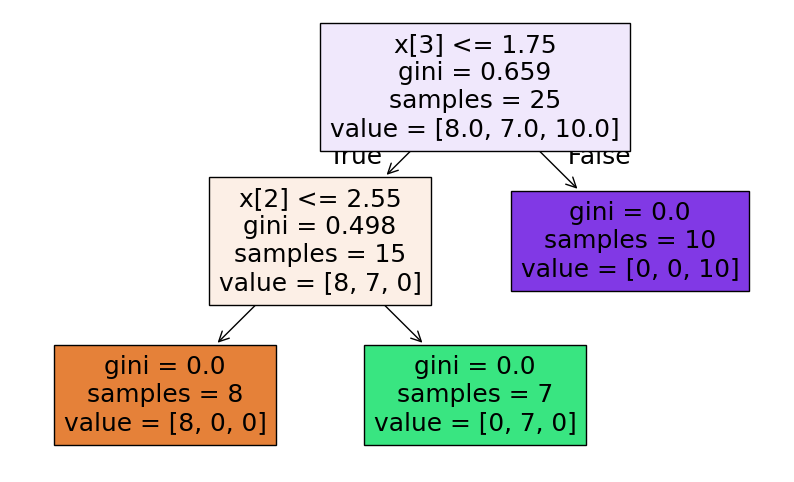

In [29]:
from sklearn import tree
plt.figure(figsize=(10,6))
tree.plot_tree(treemodel,filled=True)

In [30]:
y_pred=treemodel.predict(X_test)

In [31]:
y_pred

array([1, 2, 0, 1, 0, 1, 1, 1, 0, 1, 1, 2, 1, 0, 0, 2, 1, 0, 0, 0, 2, 2,
       2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0, 1, 0,
       1, 0, 1, 2, 2, 2, 1, 2, 1, 1, 1, 0, 0, 1, 0, 2, 0, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 0, 2, 2, 2, 2, 1, 0, 1, 2, 1, 0, 2, 1, 1, 0, 0, 0, 1,
       2, 2, 1, 0, 0, 0, 2, 2, 1, 1, 2, 2, 2, 1, 1, 0, 0, 1, 0, 0, 2, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 2, 0, 2])

In [32]:
from sklearn.metrics import accuracy_score,classification_report

In [33]:
score=accuracy_score(y_pred,y_test)
score

0.952

In [34]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.98      0.89      0.93        47
           2       0.88      0.97      0.92        36

    accuracy                           0.95       125
   macro avg       0.95      0.96      0.95       125
weighted avg       0.96      0.95      0.95       125

